In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Importing  Datasets
---------------------------------------------------------------------------------------------------------------------------------------

In [3]:
# Import train_values data
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['train_values']
train_values = ds.to_dataframe()

In [4]:
#train_values.head()

In [5]:
# Import train_values data
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['train_labels']
train_labels = ds.to_dataframe()

In [6]:
#train_labels.head()

Data Manipulations
---------------------------------------------------------------------------------------------------------------------------------------

Joining the train_values (features) and train_labels (target)

In [7]:
df = pd.merge(train_values, train_labels, how = 'inner', on = 'row_id')
df.set_index('row_id', inplace = True)

In [8]:
df.head()
#df.shape
#df.columns # check for the variable names
#df.dtypes # Examine the data types

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
row_id,,,,,,,,,,,,,,,,,,,,,
0,2,1,1,1,139.0,1,261,14,246,2,...,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True,1.0
1,2,2,1,1,160.0,3,349,48,311,1,...,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False,2.0
2,1,2,1,1,168.0,3,385,30,256,3,...,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False,3.0
3,1,2,1,1,57.0,3,117,30,46,1,...,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False,6.0
4,2,1,2,1,25.0,3,95,41,192,2,...,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False,4.0


Define a dictionary to change the data types into more appropriate types (numeric and categorical)

In [9]:
df.dtypes

loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
rate_spread                       float64
dtype: object

In [10]:
df['rate_spread_simplified'] = df['rate_spread']
convert_dict = {'loan_type': 'object', 'property_type':'object', 'loan_purpose': 'object', 'occupancy': 'object',
        'preapproval': 'object', 'msa_md': 'object', 'state_code': 'object', 'county_code': 'object',
       'applicant_ethnicity': 'object', 'applicant_race': 'object', 'applicant_sex': 'object',
       'lender': 'object', 'co_applicant': 'bool', 'loan_amount': 'float', 'rate_spread_simplified': 'object'}
df = df.astype(convert_dict)
df.dtypes

loan_type                          object
property_type                      object
loan_purpose                       object
occupancy                          object
loan_amount                       float64
preapproval                        object
msa_md                             object
state_code                         object
county_code                        object
applicant_ethnicity                object
applicant_race                     object
applicant_sex                      object
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                             object
co_applicant                         bool
rate_spread                       float64
rate_spread_simplified             object
dtype: object

Making new columns with discriptive entries for categorial variables. Better for making plots since it has decriptive labels

In [11]:
loan_type_dict = {1: 'Conventional', 2: 'FHA-insured',3: 'VA-guaranteed' , 4: 'FSA/RHS' }
df['loan_type_name'] = df['loan_type'].map(loan_type_dict)
property_type_dict= {1: 'One to four-family', 2: 'Manufactured housing',3: 'Multifamily'}
df['property_type_name'] = df['property_type'].map(property_type_dict)
loan_purpose_dict= {1: 'Home purchase', 2: 'Home improvement',3: 'Refinancing'}
df['loan_purpose_name'] = df['loan_purpose'].map(loan_purpose_dict)
occupancy_dict= {1: 'Owner-occupied', 2: 'Not owner-occupied',3: 'Not applicable'}
df['occupancy_name'] = df['occupancy'].map(occupancy_dict)
preapproval_dict= {1: 'Preapproval requested', 2: 'Preapproval not requested',3: 'Not applicable'}
df['preapproval_name'] = df['preapproval'].map(preapproval_dict)
applicant_ethnicity_dict= {1: 'Hispanic/Latino', 2: 'Not Hispanic/Latino',3: 'Info not provided', 4: 'Not applicable', 
                           5: 'No co-applicant'}
df['applicant_ethnicity_name'] = df['applicant_ethnicity'].map(applicant_ethnicity_dict)
applicant_race_dict= {1: 'Am Indian/Alaska Nat', 2: 'Asian',3: 'Black/African Am', 4: 'Nat Hawaiian/Other Pac Isl', 
                      5: 'White', 6: 'Info not provided', 7: 'Not applicable', 8: 'No co-applicant'}
df['applicant_race_name'] = df['applicant_race'].map(applicant_race_dict)
applicant_sex_dict= {1: 'Male', 2: 'Female',3: 'Information not provided',4: 'Not applicable', 5: 'Not applicable'}
df['applicant_sex_name'] = df['applicant_sex'].map(applicant_sex_dict)
rate_spread_dict= {1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9: '9+', 10: '9+', 11: '9+', 
                   12: '9+', 13: '9+', 14: '9+', 15: '9+', 16: '9+', 
                   17: '9+', 18: '9+', 19: '9+', 21: '9+', 24: '9+', 32: '9+',
                   39: '9+', 99: '9+'}
df['rate_spread_simplified'] = df['rate_spread_simplified'].map(rate_spread_dict)
coapplicant_name= {0: 'No', 1: 'Yes'}
df['co_applicant_name'] = df['co_applicant'].map(coapplicant_name)
#df.head()

Descriptive statistics for numeric variables

In [12]:
df.describe()

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,rate_spread
count,200000.000000,189292.000000,198005.000000,198005.000000,198015.000000,197977.000000,197988.000000,197984.000000,200000.000000
mean,142.574940,73.617902,5391.099099,34.238640,64595.355801,89.283022,1402.872401,1927.336618,1.979110
std,142.559487,105.696934,2669.028807,27.930882,12724.514485,15.059223,706.880410,886.576586,1.656809
min,1.000000,1.000000,7.000000,0.326000,17860.000000,6.193000,3.000000,6.000000,1.000000
25%,67.000000,39.000000,3717.000000,10.928000,56654.000000,81.648000,932.000000,1344.000000,1.000000
50%,116.000000,56.000000,4959.000000,25.996000,63485.000000,98.959000,1304.000000,1799.000000,1.000000
75%,179.000000,83.000000,6470.000000,52.000000,71238.000000,100.000000,1742.000000,2353.000000,2.000000
max,11104.000000,10042.000000,34126.000000,100.000000,125095.000000,100.000000,8747.000000,13615.000000,99.000000




Numerical features - Loan Amount
---------------

In [13]:
df.loan_amount.describe() # Size of the requested loan in thousands of dollars

count    200000.000000
mean        142.574940
std         142.559487
min           1.000000
25%          67.000000
50%         116.000000
75%         179.000000
max       11104.000000
Name: loan_amount, dtype: float64

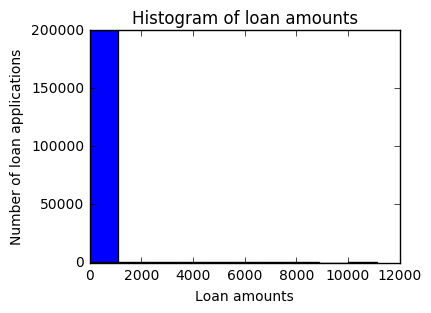

In [14]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df['loan_amount'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of loan amounts') # Give the plot a main title
ax.set_xlabel('Loan amounts') # Set text for the x axis
ax.set_ylabel('Number of loan applications');# Set text for y axis

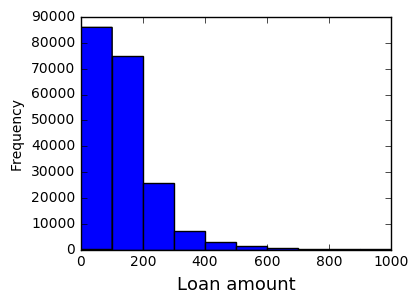

In [15]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis   
df.loc[df.loan_amount <= 1000, 'loan_amount'].plot(kind = 'hist')
plt.xlabel('Loan amount', fontsize = 13);
# If you don't want to see Matplotlib text above your plots, just add a semicolon at the end of your plot command.


Numerical features - Applicant Income
---------------

In [16]:
df.applicant_income.describe() # In thousands of dollars

count    189292.000000
mean         73.617902
std         105.696934
min           1.000000
25%          39.000000
50%          56.000000
75%          83.000000
max       10042.000000
Name: applicant_income, dtype: float64

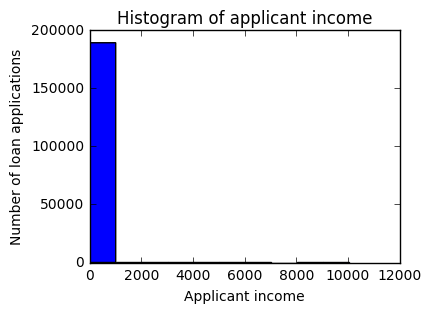

In [17]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df['applicant_income'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of applicant income') # Give the plot a main title
ax.set_xlabel('Applicant income') # Set text for the x axis
ax.set_ylabel('Number of loan applications');# Set text for y axis

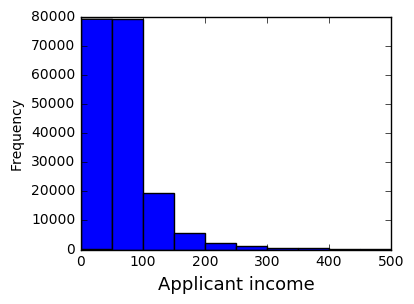

In [18]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df.loc[df.applicant_income <= 500, 'applicant_income'].plot(kind = 'hist')
plt.xlabel('Applicant income', fontsize = 13);

Numerical features - Population
---------------

In [19]:
df.population.describe() # Total population in tract

count    198005.000000
mean       5391.099099
std        2669.028807
min           7.000000
25%        3717.000000
50%        4959.000000
75%        6470.000000
max       34126.000000
Name: population, dtype: float64

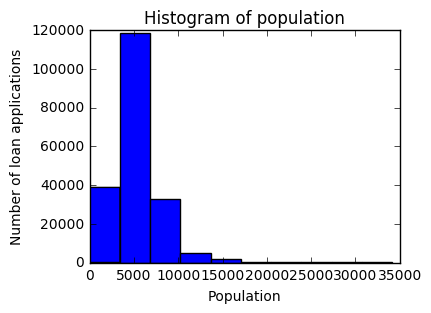

In [20]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df['population'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of population') # Give the plot a main title
ax.set_xlabel('Population') # Set text for the x axis
ax.set_ylabel('Number of loan applications');# Set text for y axis

Numerical features - Minority Population
---------------

In [21]:
df.minority_population_pct.describe()  # Percentage of minority population to total population for tract

count    198005.000000
mean         34.238640
std          27.930882
min           0.326000
25%          10.928000
50%          25.996000
75%          52.000000
max         100.000000
Name: minority_population_pct, dtype: float64

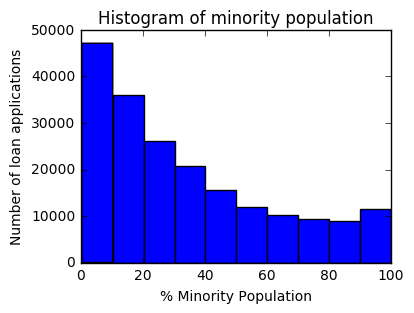

In [22]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df['minority_population_pct'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of minority population') # Give the plot a main title
ax.set_xlabel('% Minority Population') # Set text for the x axis
ax.set_ylabel('Number of loan applications');# Set text for y axis

Numerical features - FFIEC Median family income
---------------

In [23]:
df.ffiecmedian_family_income.describe() #FFIEC Median family income in dollars for the MSA/MD in which the tract is located (adjusted annually by FFIEC)

count    198015.000000
mean      64595.355801
std       12724.514485
min       17860.000000
25%       56654.000000
50%       63485.000000
75%       71238.000000
max      125095.000000
Name: ffiecmedian_family_income, dtype: float64

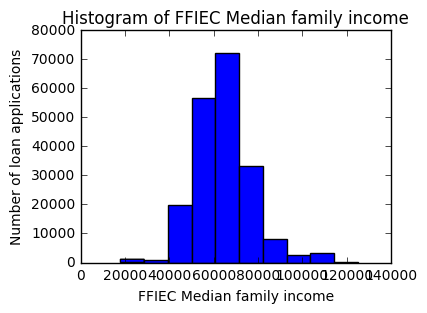

In [24]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df['ffiecmedian_family_income'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of FFIEC Median family income') # Give the plot a main title
ax.set_xlabel('FFIEC Median family income') # Set text for the x axis
ax.set_ylabel('Number of loan applications');# Set text for y axis

 Numerical features - msa_md_income_pct
---------------

In [25]:
df.tract_to_msa_md_income_pct.describe() # % of tract median family income compared to MSA/MD median family income

count    197977.000000
mean         89.283022
std          15.059223
min           6.193000
25%          81.648000
50%          98.959000
75%         100.000000
max         100.000000
Name: tract_to_msa_md_income_pct, dtype: float64

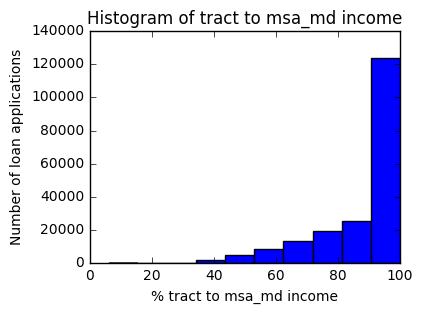

In [26]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df['tract_to_msa_md_income_pct'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of tract to msa_md income') # Give the plot a main title
ax.set_xlabel('% tract to msa_md income') # Set text for the x axis
ax.set_ylabel('Number of loan applications');# Set text for y axis

Numerical features -  Number of 1-4 family units
--------------

In [27]:
df.number_of_1_to_4_family_units.describe() #Dwellings that are built to house fewer than 5 families

count    197984.000000
mean       1927.336618
std         886.576586
min           6.000000
25%        1344.000000
50%        1799.000000
75%        2353.000000
max       13615.000000
Name: number_of_1_to_4_family_units, dtype: float64

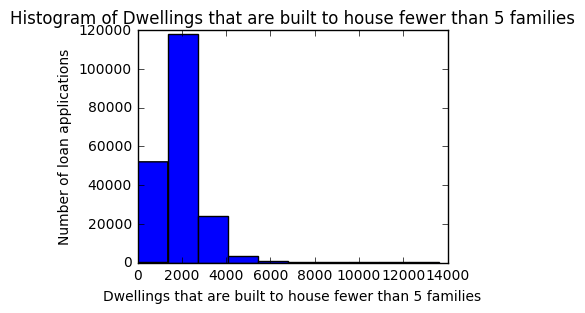

In [28]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df['number_of_1_to_4_family_units'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of Dwellings that are built to house fewer than 5 families') # Give the plot a main title
ax.set_xlabel('Dwellings that are built to house fewer than 5 families') # Set text for the x axis
ax.set_ylabel('Number of loan applications');# Set text for y axis

Numerical features - Number of occupied dwellings
-------------

In [29]:
#NEED TO RENAME THE COLUMN NAME
#df.number_of_owner-occupied_units.describe() #Number of dwellings, including individual condominiums, that are lived in by the owner

Numerical features - rate spread
----------------

In [30]:
df.rate_spread.describe()

count    200000.000000
mean          1.979110
std           1.656809
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          99.000000
Name: rate_spread, dtype: float64

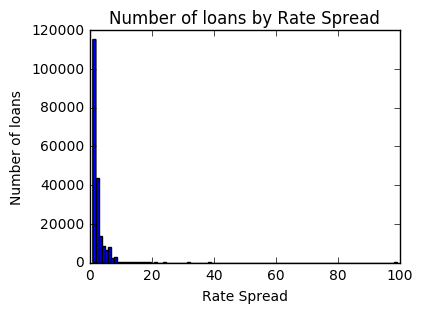

In [31]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df['rate_spread'].plot.hist(ax = ax, bins=100) # Use the plot.hist method on subset of the data frame
ax.set_title('Number of loans by Rate Spread'); # Give the plot a main title
ax.set_xlabel('Rate Spread'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis

In [32]:
#counts_rate_spread

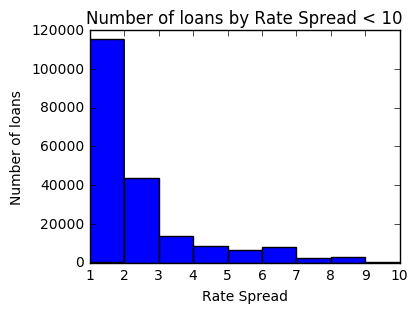

In [33]:
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
df.loc[df.rate_spread <= 10, 'rate_spread'].plot(kind = 'hist', bins=9)
ax.set_title('Number of loans by Rate Spread < 10'); # Give the plot a main title
ax.set_xlabel('Rate Spread'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis

Plotting figueres for Categorial Variables
---------------------------


In [34]:
# find the counts for each unique category
counts_rate_spread = df['rate_spread'].value_counts()
counts_rate_spread_simplified = df['rate_spread_simplified'].value_counts()
counts_loan_type_name = df['loan_type_name'].value_counts() 
counts_property_type_name = df['property_type_name'].value_counts()
counts_loan_purpose_name = df['loan_purpose_name'].value_counts()
counts_occupancy_name = df['occupancy_name'].value_counts()
counts_preapproval_name = df['preapproval_name'].value_counts()
counts_applicant_ethnicity_name = df['applicant_ethnicity_name'].value_counts()
counts_applicant_race_name = df['applicant_race_name'].value_counts()
counts_applicant_sex_name = df['applicant_sex_name'].value_counts()
counts_lender = df['lender'].value_counts()
counts_co_applicant_name = df['co_applicant_name'].value_counts()
#df.shape
#df.columns # check for the variable names
#df.dtypes # Examine the data types

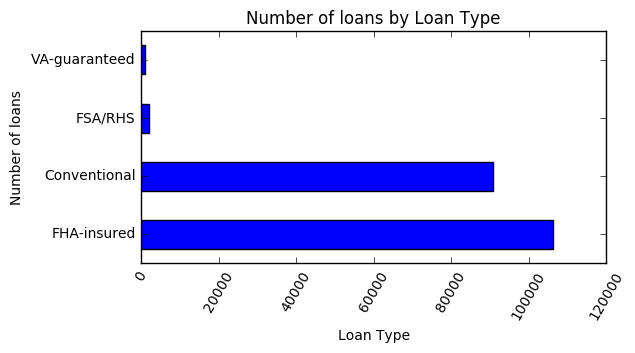

In [35]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3)) # define plot area
ax = fig.gca() # define axis    
counts_loan_type_name.plot.barh(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Loan Type'); # Give the plot a main title
ax.set_xlabel('Loan Type'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis
plt.xticks(rotation=60);
#ax.set_xticklabels(['Tom', 'Dick', 'Harry', 'Sally'])

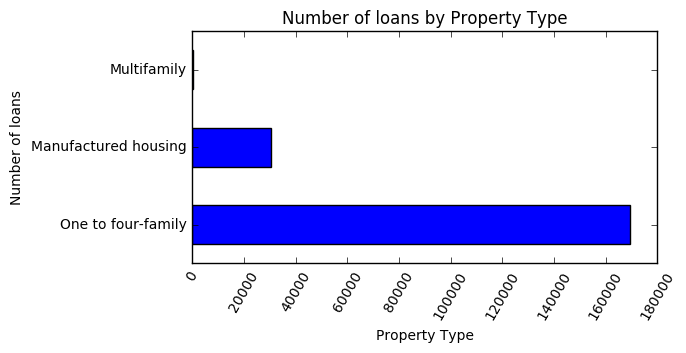

In [36]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3)) # define plot area
ax = fig.gca() # define axis    
counts_property_type_name.plot.barh(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Property Type'); # Give the plot a main title
ax.set_xlabel('Property Type'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis
plt.xticks(rotation=60);

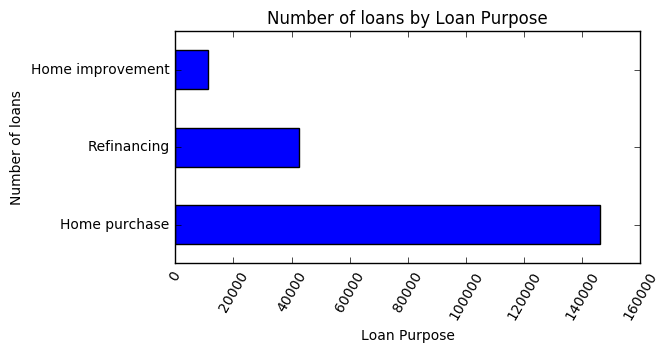

In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3)) # define plot area
ax = fig.gca() # define axis    
counts_loan_purpose_name.plot.barh(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Loan Purpose'); # Give the plot a main title
ax.set_xlabel('Loan Purpose'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis
plt.xticks(rotation=60);

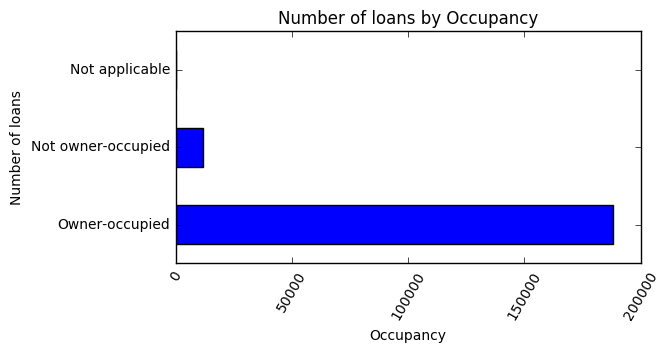

In [38]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3)) # define plot area
ax = fig.gca() # define axis    
counts_occupancy_name.plot.barh(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Occupancy'); # Give the plot a main title
ax.set_xlabel('Occupancy'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis
plt.xticks(rotation=60);

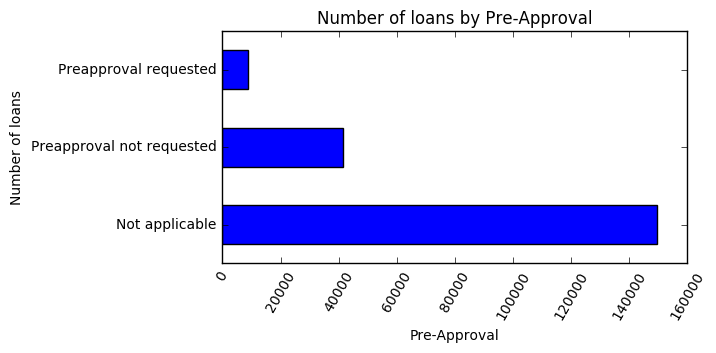

In [39]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3)) # define plot area
ax = fig.gca() # define axis    
counts_preapproval_name.plot.barh(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Pre-Approval'); # Give the plot a main title
ax.set_xlabel('Pre-Approval'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis
plt.xticks(rotation=60);

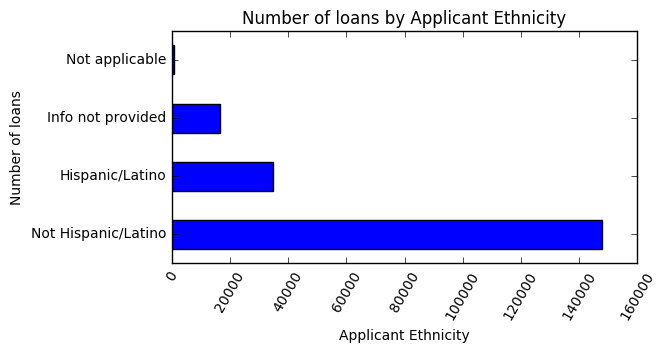

In [40]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3)) # define plot area
ax = fig.gca() # define axis    
counts_applicant_ethnicity_name.plot.barh(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Applicant Ethnicity'); # Give the plot a main title
ax.set_xlabel('Applicant Ethnicity'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis
plt.xticks(rotation=60);

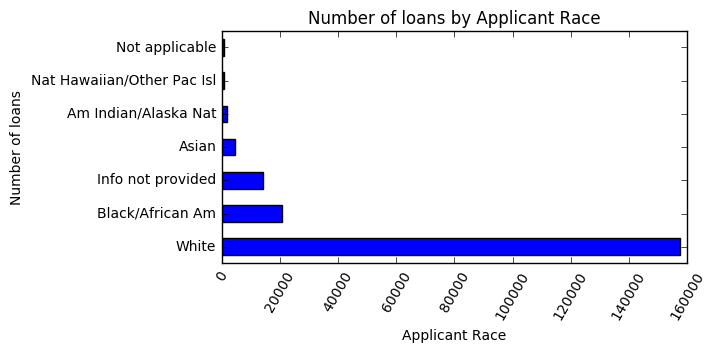

In [41]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3)) # define plot area
ax = fig.gca() # define axis    
counts_applicant_race_name.plot.barh(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Applicant Race'); # Give the plot a main title
ax.set_xlabel('Applicant Race'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis
plt.xticks(rotation=60);

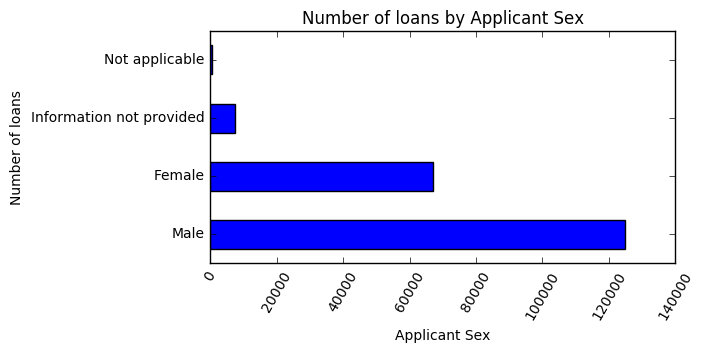

In [42]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3)) # define plot area
ax = fig.gca() # define axis    
counts_applicant_sex_name.plot.barh(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Applicant Sex'); # Give the plot a main title
ax.set_xlabel('Applicant Sex'); # Set text for the x axis
ax.set_ylabel('Number of loans');# Set text for y axis
plt.xticks(rotation=60);

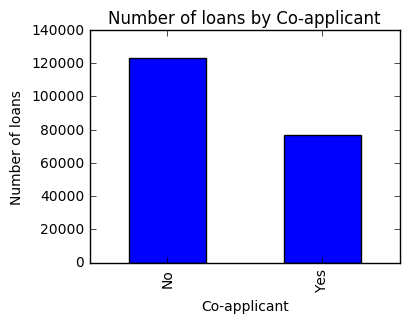

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
counts_co_applicant_name.plot.bar(ax = ax); # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Co-applicant'); # Give the plot a main title
ax.set_xlabel('Co-applicant'); # Set text for the x axis
ax.set_ylabel('Number of loans'); # Set text for y axis

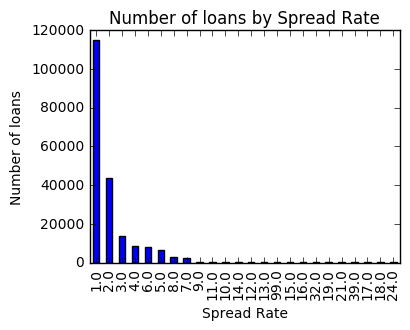

In [44]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
counts_rate_spread.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Spread Rate') # Give the plot a main title
ax.set_xlabel('Spread Rate') # Set text for the x axis
ax.set_ylabel('Number of loans')# Set text for y axis

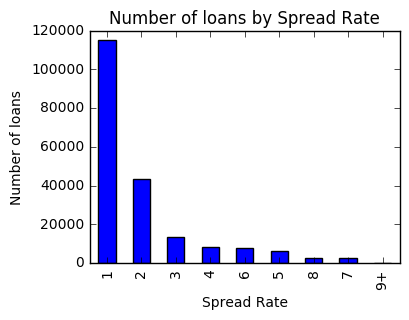

In [45]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3)) # define plot area
ax = fig.gca() # define axis    
counts_rate_spread_simplified.plot.bar(ax = ax); # Use the plot.bar method on the counts data frame
ax.set_title('Number of loans by Spread Rate'); # Give the plot a main title
ax.set_xlabel('Spread Rate'); # Set text for the x axis
ax.set_ylabel('Number of loans'); # Set text for y axis

Group by plots
-------------------------------

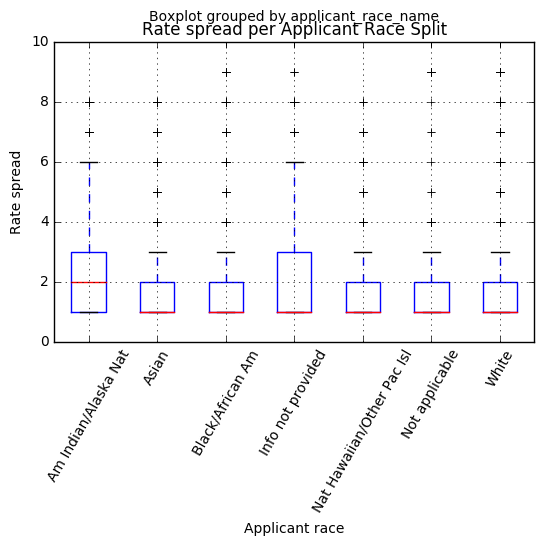

In [46]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,10)
df[['rate_spread','applicant_race_name']].boxplot(by = 'applicant_race_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Applicant Race Split'); # Give the plot a main title
ax.set_xlabel('Applicant race'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

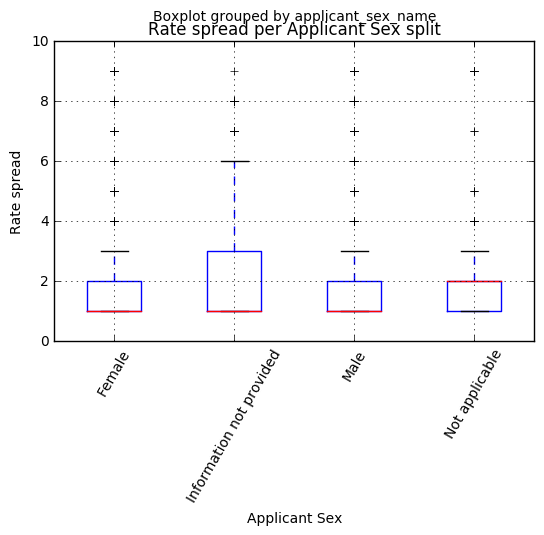

In [47]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,10)
df[['rate_spread','applicant_sex_name']].boxplot(by = 'applicant_sex_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Applicant Sex split'); # Give the plot a main title
ax.set_xlabel('Applicant Sex'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

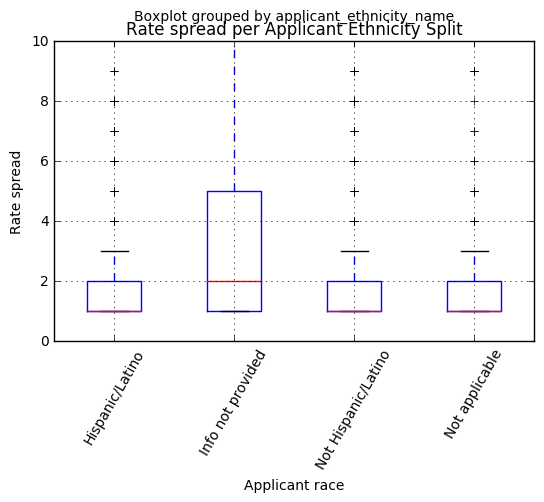

In [48]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,10)
df[['rate_spread','applicant_ethnicity_name']].boxplot(by = 'applicant_ethnicity_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Applicant Ethnicity Split'); # Give the plot a main title
ax.set_xlabel('Applicant race'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

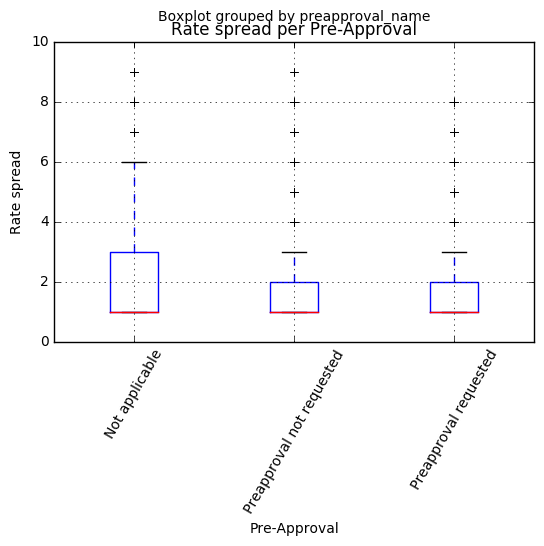

In [49]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,10)
df[['rate_spread','preapproval_name']].boxplot(by = 'preapproval_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Pre-Approval'); # Give the plot a main title
ax.set_xlabel('Pre-Approval'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

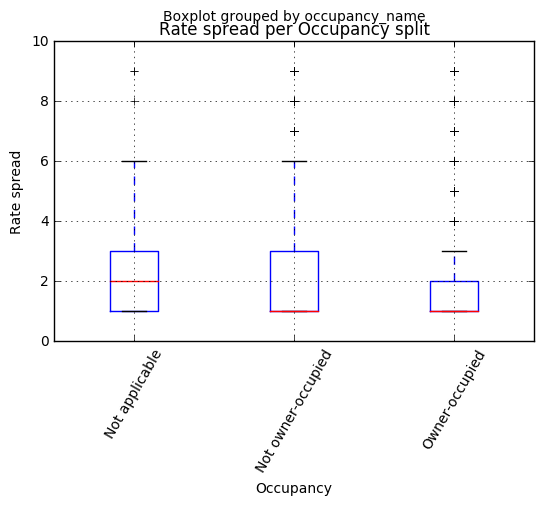

In [50]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,10)
df[['rate_spread','occupancy_name']].boxplot(by = 'occupancy_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Occupancy split'); # Give the plot a main title
ax.set_xlabel('Occupancy'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

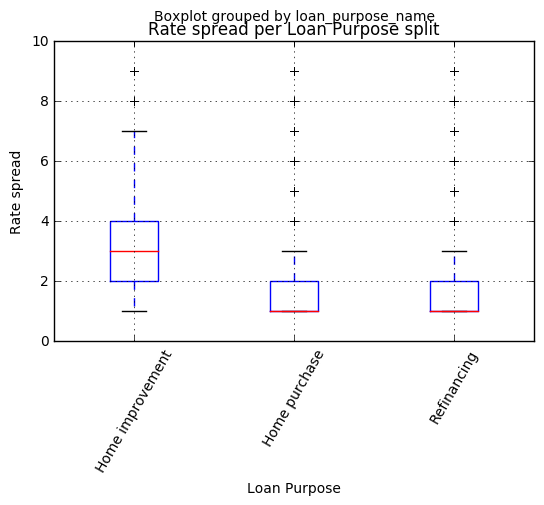

In [51]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,10)
df[['rate_spread','loan_purpose_name']].boxplot(by = 'loan_purpose_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Loan Purpose split'); # Give the plot a main title
ax.set_xlabel('Loan Purpose'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

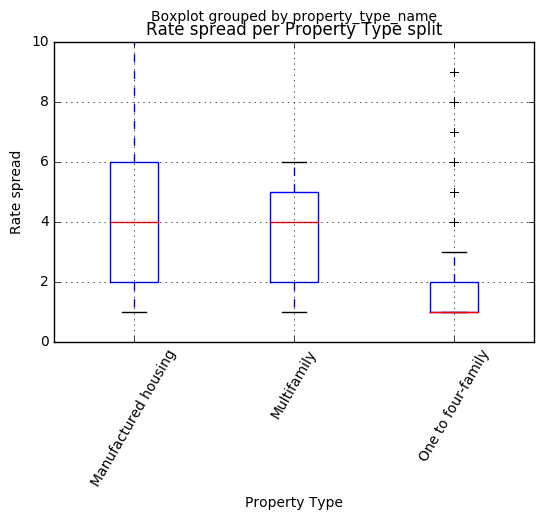

In [52]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,10)
df[['rate_spread','property_type_name']].boxplot(by = 'property_type_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Property Type split'); # Give the plot a main title
ax.set_xlabel('Property Type'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

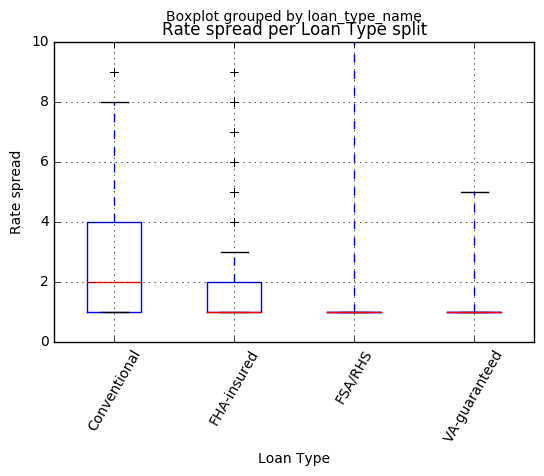

In [53]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,10)
df[['rate_spread','loan_type_name']].boxplot(by = 'loan_type_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Loan Type split'); # Give the plot a main title
ax.set_xlabel('Loan Type'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

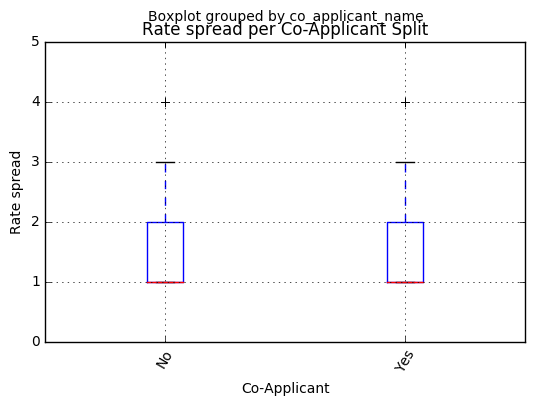

In [54]:
fig = plt.figure(figsize=(6,4)) # define plot area
ax = fig.gca() # define axis
plt.ylim(0,5)
df[['rate_spread','co_applicant_name']].boxplot(by = 'co_applicant_name', ax = ax); # Use the plot.bar method on the new data frame
plt.xticks(rotation=60);
ax.set_title('Rate spread per Co-Applicant Split'); # Give the plot a main title
ax.set_xlabel('Co-Applicant'); # Set text for the x axis
ax.set_ylabel('Rate spread');# Set text for y axis

Create a Pair-Wise Scatter Plots
-----------------

In [55]:
## Compute the log of the auto price
df['loan_amount_ln'] = np.log(df.loan_amount)
df['applicant_income_ln'] = np.log(df.applicant_income)
df['rate_spread_ln'] = np.log(df.rate_spread)
df['population_k'] = df.population/1000

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


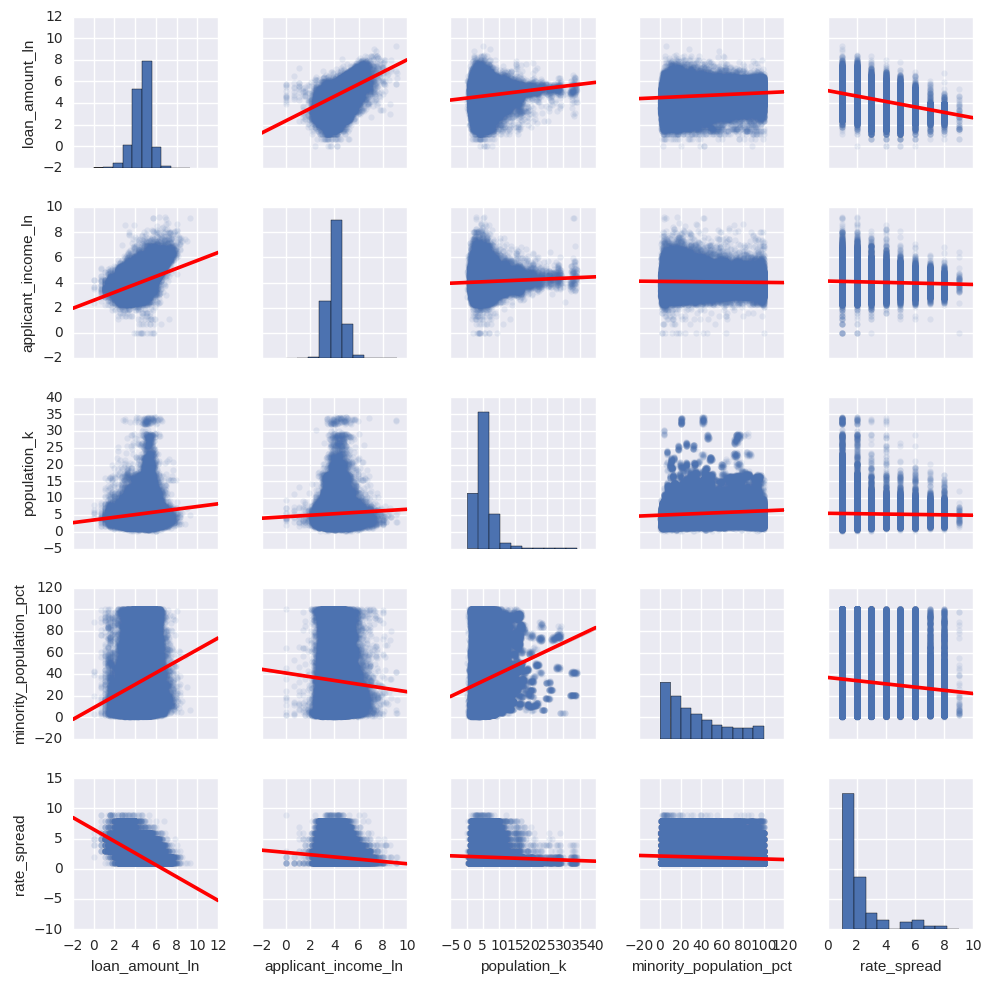

In [56]:
df2=df.loc[df.rate_spread < 10]
df2.dropna(axis = 0, inplace = True)
import seaborn as sns
columns1 = ["loan_amount_ln", "applicant_income_ln", "population_k", "minority_population_pct", "rate_spread"]
sns.pairplot(df2[columns1], size=2, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


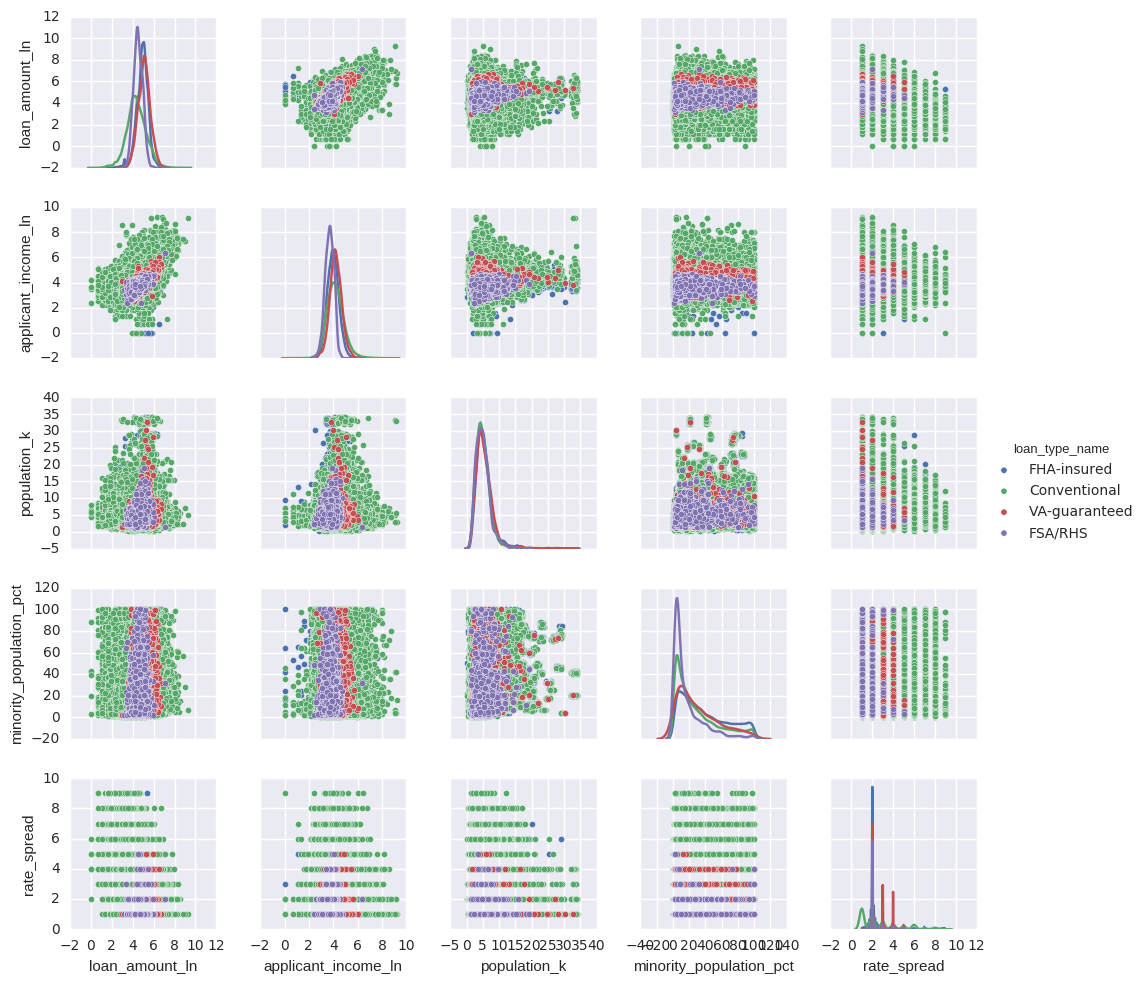

In [57]:
columns2 = ["loan_amount_ln", "applicant_income_ln", "population_k", "minority_population_pct", "rate_spread", 'loan_type_name']
sns.pairplot(df2[columns2], hue= 'loan_type_name',size=2, diag_kind="kde")

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


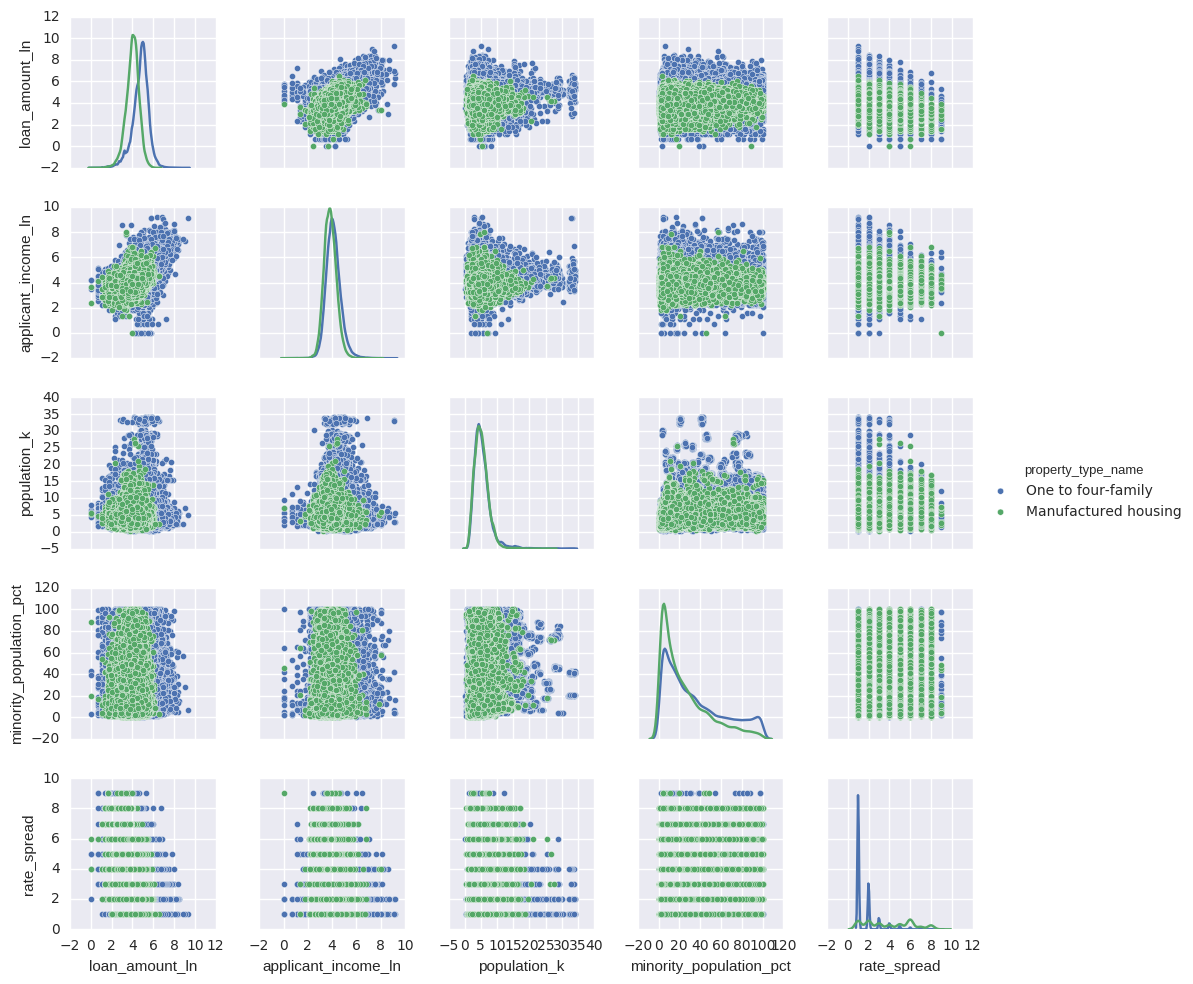

In [58]:
columns3 = ["loan_amount_ln", "applicant_income_ln", "population_k", "minority_population_pct", "rate_spread", 'property_type_name']
sns.pairplot(df2[columns3], hue= 'property_type_name',size=2, diag_kind="kde")

In [59]:
#No so interesting
#columns2 = ["ffiecmedian_family_income", "tract_to_msa_md_income_pct", "number_of_owner-occupied_units", "number_of_1_to_4_family_units", "rate_spread"]
#sns.pairplot(df2[columns2], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Correlations
-------------

In [60]:
df[df.columns[1:]].corr()['loan_amount'][:]


loan_amount                       1.000000
applicant_income                  0.446577
population                        0.061305
minority_population_pct           0.094808
ffiecmedian_family_income         0.236394
tract_to_msa_md_income_pct        0.104496
number_of_owner-occupied_units    0.019172
number_of_1_to_4_family_units    -0.032762
co_applicant                      0.070007
rate_spread                      -0.218168
loan_amount_ln                    0.733873
applicant_income_ln               0.489610
rate_spread_ln                   -0.226241
population_k                      0.061305
Name: loan_amount, dtype: float64

In [61]:
df[df.columns[1:]].corr()['rate_spread'][:]

loan_amount                      -0.218168
applicant_income                 -0.020662
population                       -0.034157
minority_population_pct          -0.076955
ffiecmedian_family_income        -0.084964
tract_to_msa_md_income_pct        0.010798
number_of_owner-occupied_units    0.004927
number_of_1_to_4_family_units     0.020661
co_applicant                      0.042659
rate_spread                       1.000000
loan_amount_ln                   -0.459279
applicant_income_ln              -0.070935
rate_spread_ln                    0.934911
population_k                     -0.034157
Name: rate_spread, dtype: float64